## Business Case - ecomm

#### ABC is an American multinational retail corporation that operates a chain of supercenters, discount departmental stores, and grocery stores from the United States. Walmart has more than 100 million customers worldwide.

## Problem Statement:

#### The Management team at Walmart Inc. wants to analyze the customer purchase behavior (specifically, purchase amount) against the customer’s gender and the various other factors to help the business make better decisions. They want to understand if the spending habits differ between male and female customers: Do women spend more on Black Friday than men? (Assume 50 million customers are male and 50 million are female).

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

In [2]:
df = pd.read_csv('ecomm.txt')
df.head()

,User_ID,Product_ID,Gender,Age,Occupation,City_Category,Stay_In_Current_City_Years,Marital_Status,Product_Category,Purchase
0,1000001,P00069042,F,0-17,10,A,2,0,3,8370
1,1000001,P00248942,F,0-17,10,A,2,0,1,15200
2,1000001,P00087842,F,0-17,10,A,2,0,12,1422
3,1000001,P00085442,F,0-17,10,A,2,0,12,1057
4,1000002,P00285442,M,55+,16,C,4+,0,8,7969


In [3]:
df.shape

(550068, 10)

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 550068 entries, 0 to 550067
Data columns (total 10 columns):
 #   Column                      Non-Null Count   Dtype 
---  ------                      --------------   ----- 
 0   User_ID                     550068 non-null  int64 
 1   Product_ID                  550068 non-null  object
 2   Gender                      550068 non-null  object
 3   Age                         550068 non-null  object
 4   Occupation                  550068 non-null  int64 
 5   City_Category               550068 non-null  object
 6   Stay_In_Current_City_Years  550068 non-null  object
 7   Marital_Status              550068 non-null  int64 
 8   Product_Category            550068 non-null  int64 
 9   Purchase                    550068 non-null  int64 
dtypes: int64(5), object(5)
memory usage: 42.0+ MB


In [5]:
df.isnull().sum()/len(df)*100

User_ID                       0.0
Product_ID                    0.0
Gender                        0.0
Age                           0.0
Occupation                    0.0
City_Category                 0.0
Stay_In_Current_City_Years    0.0
Marital_Status                0.0
Product_Category              0.0
Purchase                      0.0
dtype: float64

#### From the above it is clear that there are no null values in the data

In [6]:
df.describe()

,User_ID,Occupation,Marital_Status,Product_Category,Purchase
count,5.500680e+05,550068.000000,550068.000000,550068.000000,550068.000000
mean,1.003029e+06,8.076707,0.409653,5.404270,9263.968713
std,1.727592e+03,6.522660,0.491770,3.936211,5023.065394
min,1.000001e+06,0.000000,0.000000,1.000000,12.000000
25%,1.001516e+06,2.000000,0.000000,1.000000,5823.000000
50%,1.003077e+06,7.000000,0.000000,5.000000,8047.000000
75%,1.004478e+06,14.000000,1.000000,8.000000,12054.000000
max,1.006040e+06,20.000000,1.000000,20.000000,23961.000000


#### Convert Gender and City_Category columns to numerical

In [7]:
df['Gender'] = df['Gender'].apply(lambda x:1 if x=='M' else 0)
df['City_Category'] = df['City_Category'].apply(lambda x:0 if x=='A' else 1 if x=='B' else 2)

#### Outlier Analysis

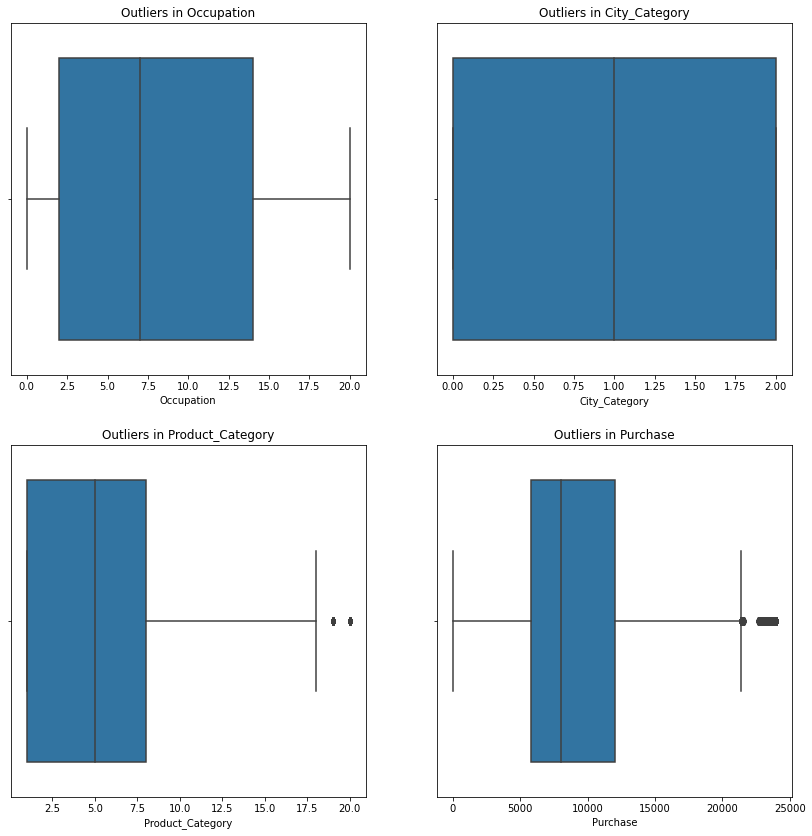

In [8]:
fig, axis = plt.subplots(nrows=2, ncols=2, figsize=(14, 10))
fig.subplots_adjust(top=1.2)
sns.boxplot(x='Occupation',data = df,ax=axis[0,0]).set_title('Outliers in Occupation')
sns.boxplot(x='City_Category',data = df,ax=axis[0,1]).set_title('Outliers in City_Category')
sns.boxplot(x='Product_Category',data = df,ax=axis[1,0]).set_title('Outliers in Product_Category')
sns.boxplot(x='Purchase',data = df,ax=axis[1,1]).set_title('Outliers in Purchase')

plt.show()

#### clearly there are outliers in product and purchase columns. We're using CLT to find out intervals, so there's no need to remove the outliers.

### Gender Analysis

In [9]:
df.Gender.value_counts()

1    414259
0    135809
Name: Gender, dtype: int64

#### The number of users that are actually present in the dataset. We need to extrapolate the information from these customers to 100million users.

In [10]:
df.groupby('Gender')['User_ID'].nunique()

Gender
0    1666
1    4225
Name: User_ID, dtype: int64

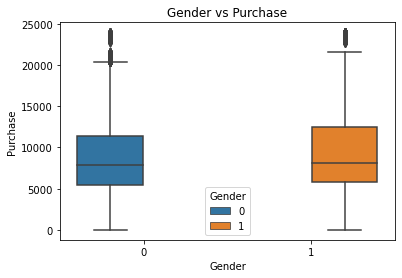

In [11]:
sns.boxplot(x='Gender', y='Purchase', data=df,hue='Gender')
plt.title('Gender vs Purchase')
plt.show()

#### We can see that the median of both males and female customers are almost in the same range.

In [12]:
df.groupby('Gender')['Purchase'].describe()

,count,mean,std,min,25%,50%,75%,max
Gender,,,,,,,,
0,135809.0,8734.565765,4767.233289,12.0,5433.0,7914.0,11400.0,23959.0
1,414259.0,9437.526040,5092.186210,12.0,5863.0,8098.0,12454.0,23961.0


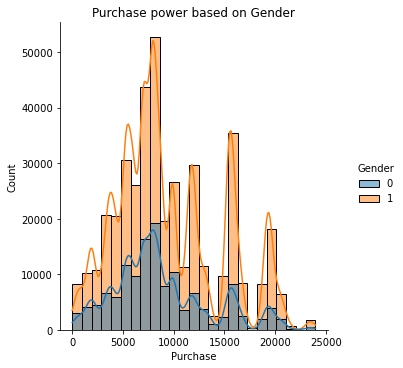

In [13]:
sns.displot(x='Purchase', bins=25, kde=True,hue='Gender', data=df)
plt.title('Purchase power based on Gender')
plt.show()

#### We can't say from here that male customers are buying more in number than females.
### CLT Analysis

In [ ]:
sample_size=300
male_sample_means=[df[df['Gender']==1].sample(sample_size, replace=True)['Purchase'].mean() for i in range(1000)]

In [ ]:
females_sample_means=[df[df['Gender']==0].sample(sample_size, replace=True)['Purchase'].mean() for i in range(1000)]

In [ ]:
sns.distplot(male_sample_means)
plt.title('Male sample means')
plt.show()

In [ ]:
sns.distplot(females_sample_means)
plt.title('Females sample means')
plt.show()

In [ ]:
male_upper_limit= np.mean(male_sample_means) + (1.96 * np.std(male_sample_means))
male_lower_limit= np.mean(male_sample_means) - (1.96 * np.std(male_sample_means))
print(f'The mean of males purchasing lies between with 95% confidence :{(male_lower_limit, male_upper_limit)}')
female_upper_limit= np.mean(females_sample_means) + (1.96 * np.std(females_sample_means))
female_lower_limit= np.mean(females_sample_means) - (1.96 * np.std(females_sample_means))
print(f'The mean of females purchasing lies between with 95% confidence :{(female_lower_limit, female_upper_limit)}')

In [ ]:
male_upper_limit= np.mean(male_sample_means) + (1.645 * np.std(male_sample_means))
male_lower_limit= np.mean(male_sample_means) - (1.645 * np.std(male_sample_means))
print(f'The mean of males purchasing lies between with 90% confidence :{(male_lower_limit, male_upper_limit)}')
female_upper_limit= np.mean(females_sample_means) + (1.645 * np.std(females_sample_means))
female_lower_limit= np.mean(females_sample_means) - (1.645 * np.std(females_sample_means))
print(f'The mean of females purchasing lies between with 90% confidence :{(female_lower_limit, female_upper_limit)}')

In [ ]:
male_upper_limit= np.mean(male_sample_means) + (2.58 * np.std(male_sample_means))
male_lower_limit= np.mean(male_sample_means) - (2.58 * np.std(male_sample_means))
print(f'The mean of males purchasing lies between with 99% confidence :{(male_lower_limit, male_upper_limit)}')
female_upper_limit= np.mean(females_sample_means) + (2.58 * np.std(females_sample_means))
female_lower_limit= np.mean(females_sample_means) - (2.58 * np.std(females_sample_means))
print(f'The mean of females purchasing lies between with 99% confidence :{(female_lower_limit, female_upper_limit)}')

#### I can see the range is overlaping, so we can't decide if the males are buying more on the holiday season than females.

### Married and Unmarried Analysis

In [ ]:
df.Marital_Status.value_counts()

In [ ]:
df.groupby('Marital_Status')['User_ID'].nunique()

In [ ]:
df.groupby('Marital_Status')['Purchase'].describe()

In [ ]:
sns.displot(x='Purchase', bins=25, kde=True,hue='Marital_Status', data=df )
plt.title('Marital status vs Purchase')
plt.show()

#### We can't say that the Unmarried people are buying more in number yet.

In [ ]:
married_sample_means=[df[df['Marital_Status']==1].sample(sample_size, replace=True)['Purchase'].mean() for i in range(1000)]

In [ ]:
unmarried_sample_means=[df[df['Marital_Status']==0].sample(sample_size, replace=True)['Purchase'].mean() for i in range(1000)]

In [ ]:
sns.distplot(married_sample_means)
plt.title('Married sample means')
plt.show()

In [ ]:
sns.distplot(unmarried_sample_means)
plt.title('Unmarried sample means')
plt.show()

In [ ]:
married_upper_limit= np.mean(married_sample_means) + (1.96 * np.std(married_sample_means))
married_lower_limit= np.mean(married_sample_means) - (1.96 * np.std(married_sample_means))
print(f'The mean of married people purchasing lies between with 95% confidence is :{(married_lower_limit, married_upper_limit)}')
unmarried_upper_limit= np.mean(unmarried_sample_means) + (1.96 * np.std(unmarried_sample_means))
unmarried_lower_limit= np.mean(unmarried_sample_means) - (1.96 * np.std(unmarried_sample_means))
print(f'The mean of unmarried people purchasing lies between with 95% confidence is :{(unmarried_lower_limit,unmarried_upper_limit)}')

In [ ]:
married_upper_limit= np.mean(married_sample_means) + (1.645 * np.std(married_sample_means))
married_lower_limit= np.mean(married_sample_means) - (1.645 * np.std(married_sample_means))
print(f'The mean of married people purchasing lies between with 90% confidence is :{(married_lower_limit, married_upper_limit)}')
unmarried_upper_limit= np.mean(unmarried_sample_means) + (1.645 * np.std(unmarried_sample_means))
unmarried_lower_limit= np.mean(unmarried_sample_means) - (1.645 * np.std(unmarried_sample_means))
print(f'The mean of unmarried people purchasing lies between with 90% confidence is :{(unmarried_lower_limit,unmarried_upper_limit)}')

In [ ]:
married_upper_limit= np.mean(married_sample_means) + (2.58 * np.std(married_sample_means))
married_lower_limit= np.mean(married_sample_means) - (2.58 * np.std(married_sample_means))
print(f'The mean of married people purchasing lies between with 99% confidence is :{(married_lower_limit, married_upper_limit)}')
unmarried_upper_limit= np.mean(unmarried_sample_means) + (2.58 * np.std(unmarried_sample_means))
unmarried_lower_limit= np.mean(unmarried_sample_means) - (2.58 * np.std(unmarried_sample_means))
print(f'The mean of unmarried people purchasing lies between with 99% confidence is :{(unmarried_lower_limit,unmarried_upper_limit)}')

#### Can't say either that Married people are buying more in number than Unmarried or Vice versa

### Age Analysis

In [ ]:
df.Age.value_counts()

In [ ]:
df.groupby('Age')['User_ID'].nunique()

In [ ]:
df.groupby('Age')['Purchase'].describe()

In [ ]:
sns.displot(x='Purchase', bins=25, kde=True,hue='Age', data=df )
plt.title('Age vs Purchase')
plt.show()

#### Generally we can see that the people in the range between the age group of 26-35 are buying more but we can't say that yet.

In [ ]:
sample_means1=[df[df['Age']=='0-17'].sample(sample_size, replace=True)['Purchase'].mean() for i in range(1000)]
sample_means2=[df[df['Age']=='18-25'].sample(sample_size, replace=True)['Purchase'].mean() for i in range(1000)]
sample_means3=[df[df['Age']=='26-35'].sample(sample_size, replace=True)['Purchase'].mean() for i in range(1000)]
sample_means4=[df[df['Age']=='36-45'].sample(sample_size, replace=True)['Purchase'].mean() for i in range(1000)]
sample_means5=[df[df['Age']=='46-50'].sample(sample_size, replace=True)['Purchase'].mean() for i in range(1000)]
sample_means6=[df[df['Age']=='51-55'].sample(sample_size, replace=True)['Purchase'].mean() for i in range(1000)]
sample_means7=[df[df['Age']=='55+'].sample(sample_size, replace=True)['Purchase'].mean() for i in range(1000)]

In [ ]:
sns.distplot(sample_means1)
plt.title('Age Group of 0-17')
plt.show()

In [ ]:
sns.distplot(sample_means2)
plt.title('Age Group of 18-25')
plt.show()

In [ ]:
sns.distplot(sample_means3)
plt.title('Age Group of 26-35')
plt.show()

In [ ]:
sns.distplot(sample_means4)
plt.title('Age Group of 36-45')
plt.show()

In [ ]:
sns.distplot(sample_means5)
plt.title('Age Group of 46-50')
plt.show()

In [ ]:
sns.distplot(sample_means6)
plt.title('Age Group of 51-55')
plt.show()

In [ ]:
sns.distplot(sample_means7)
plt.title('Age Group of 55+')
plt.show()

In [ ]:
upper_limit1= np.mean(sample_means1) + (1.96 * np.std(sample_means1))
lower_limit1= np.mean(sample_means1) - (1.96 * np.std(sample_means1))
print(f'confidence intervals for 0-17 years of age with 95% is:{(lower_limit1,upper_limit1)}')

upper_limit2= np.mean(sample_means2) + (1.96 * np.std(sample_means2))
lower_limit2= np.mean(sample_means2) - (1.96 * np.std(sample_means2))
print(f'confidence intervals for 18-25 years of age with 95% is:{(lower_limit2,upper_limit2)}')

upper_limit3= np.mean(sample_means3) + (1.96 * np.std(sample_means3))
lower_limit3= np.mean(sample_means3) - (1.96 * np.std(sample_means3))
print(f'confidence intervals for 26-35 years of age with 95% is:{(lower_limit3,upper_limit3)}')

upper_limit4= np.mean(sample_means4) + (1.96 * np.std(sample_means4))
lower_limit4= np.mean(sample_means4) - (1.96 * np.std(sample_means4))
print(f'confidence intervals for 36-45 years of age with 95% is:{(lower_limit4,upper_limit4)}')

upper_limit5= np.mean(sample_means5) + (1.96 * np.std(sample_means5))
lower_limit5= np.mean(sample_means5) - (1.96 * np.std(sample_means5))
print(f'confidence intervals for 46-50 years of age with 95% is:{(lower_limit5,upper_limit5)}')

upper_limit6= np.mean(sample_means6) + (1.96 * np.std(sample_means6))
lower_limit6= np.mean(sample_means6) - (1.96 * np.std(sample_means6))
print(f'confidence intervals for 51-55 years of age with 95% is:{(lower_limit6,upper_limit6)}')

upper_limit7= np.mean(sample_means7) + (1.96 * np.std(sample_means7))
lower_limit7= np.mean(sample_means7) - (1.96 * np.std(sample_means7))
print(f'confidence intervals for 55+ years of age with 95% is:{(lower_limit7,upper_limit7)}')

In [ ]:
upper_limit1= np.mean(sample_means1) + (1.645 * np.std(sample_means1))
lower_limit1= np.mean(sample_means1) - (1.645 * np.std(sample_means1))
print(f'confidence intervals for 0-17 years of age with 90% is:{(lower_limit1,upper_limit1)}')

upper_limit2= np.mean(sample_means2) + (1.645 * np.std(sample_means2))
lower_limit2= np.mean(sample_means2) - (1.645 * np.std(sample_means2))
print(f'confidence intervals for 18-25 years of age with 90% is:{(lower_limit2,upper_limit2)}')

upper_limit3= np.mean(sample_means3) + (1.645 * np.std(sample_means3))
lower_limit3= np.mean(sample_means3) - (1.645 * np.std(sample_means3))
print(f'confidence intervals for 26-35 years of age with 90% is:{(lower_limit3,upper_limit3)}')

upper_limit4= np.mean(sample_means4) + (1.645 * np.std(sample_means4))
lower_limit4= np.mean(sample_means4) - (1.645 * np.std(sample_means4))
print(f'confidence intervals for 36-45 years of age with 90% is:{(lower_limit4,upper_limit4)}')

upper_limit5= np.mean(sample_means5) + (1.645 * np.std(sample_means5))
lower_limit5= np.mean(sample_means5) - (1.645 * np.std(sample_means5))
print(f'confidence intervals for 46-50 years of age with 90% is:{(lower_limit5,upper_limit5)}')

upper_limit6= np.mean(sample_means6) + (1.645 * np.std(sample_means6))
lower_limit6= np.mean(sample_means6) - (1.645 * np.std(sample_means6))
print(f'confidence intervals for 51-55 years of age with 90% is:{(lower_limit6,upper_limit6)}')

upper_limit7= np.mean(sample_means7) + (1.645 * np.std(sample_means7))
lower_limit7= np.mean(sample_means7) - (1.645 * np.std(sample_means7))
print(f'confidence intervals for 55+ years of age with 90% is:{(lower_limit7,upper_limit7)}')

In [ ]:
upper_limit1= np.mean(sample_means1) + (2.58 * np.std(sample_means1))
lower_limit1= np.mean(sample_means1) - (2.58 * np.std(sample_means1))
print(f'confidence intervals for 0-17 years of age with 99% is:{(lower_limit1,upper_limit1)}')

upper_limit2= np.mean(sample_means2) + (2.58 * np.std(sample_means2))
lower_limit2= np.mean(sample_means2) - (2.58 * np.std(sample_means2))
print(f'confidence intervals for 18-25 years of age with 99% is:{(lower_limit2,upper_limit2)}')

upper_limit3= np.mean(sample_means3) + (2.58 * np.std(sample_means3))
lower_limit3= np.mean(sample_means3) - (2.58 * np.std(sample_means3))
print(f'confidence intervals for 26-35 years of age with 99% is:{(lower_limit3,upper_limit3)}')

upper_limit4= np.mean(sample_means4) + (2.58 * np.std(sample_means4))
lower_limit4= np.mean(sample_means4) - (2.58 * np.std(sample_means4))
print(f'confidence intervals for 36-45 years of age with 99% is:{(lower_limit4,upper_limit4)}')

upper_limit5= np.mean(sample_means5) + (2.58 * np.std(sample_means5))
lower_limit5= np.mean(sample_means5) - (2.58 * np.std(sample_means5))
print(f'confidence intervals for 46-50 years of age with 99% is:{(lower_limit5,upper_limit5)}')

upper_limit6= np.mean(sample_means6) + (2.58 * np.std(sample_means6))
lower_limit6= np.mean(sample_means6) - (2.58 * np.std(sample_means6))
print(f'confidence intervals for 51-55 years of age with 99% is:{(lower_limit6,upper_limit6)}')

upper_limit7= np.mean(sample_means7) + (2.58 * np.std(sample_means7))
lower_limit7= np.mean(sample_means7) - (2.58 * np.std(sample_means7))
print(f'confidence intervals for 55+ years of age with 99% is:{(lower_limit7,upper_limit7)}')

#### From all the comparisions between the intervals we can say that the purchsing factor does not depend on the Age too. As the intervals are overlapping with each other.

## Conclusions

#### 1. We can say that any factor is not effecting the purchasing capacity here as the intervals are overlapping with each other.
#### As we're extrapolating this data to the 100 million users we're looking at the AVERAGE buying capacity of different group of people.
#### 2. Coming to the Gender we can see the male customers are buying more in number in usual way but that not true as the Average buying capacity intervals of both male and female customers are overlapping, so I can rule that out.
#### 3. With Marital status, it seems Unmarried people are buying more in number but that's not the case here. The Average buying capacity of both Unmarried and married people are overlapping so we can't say that either.
#### 4. With Age as constraint it also seems like the people in the age group of 25-36 are buying more but that is also baseless as the intervals are overlapping with other age group people Purchase capacity.
### Finally we can say that while on holiday shopping there are no constraints and people are buying more no matter what the age group is, Gender and Marital status. So we can target wide range of audience here.